<h3>ISAT 6700   Spring 2025</h3>
<h3>Ashish Khanal  W0675109   </h3>
<h3>Final Project</h3>

## Solar System  3D openGL

The Sun and planets are displayed using the gluSphere() inside drawSphere(radius)  function . This creates a 3D sphere using latitude and longitude slices, and it is rendered at the current OpenGL position.

Each planet's data (distance from sun, size, speed, color, moons, rotate speed) is  in a list called planet_data. During each frame, the planet is rotated around the Sun by  (glRotatef) based on orbit speed, then translated outward (glTranslatef) for revolution. The planet spins around its own axis.

Saturn's rings are drawn using the drawRing() function, which uses GL_QUAD_STRIP to form a flat circular strip between an inner and outer radius.    

Stars are randomly generated as 3D coordinates in space and  drawn as points using GL_POINTS. new_Twinkle checks  whether each star is in a bright or dim state. On every frame, a stars randomly flip between these states (255 or 128) creating twinkling.

Camera movement is handled through key inputs. Arrow keys and Page Up/Down translate the camera's position by modifying myX, myY, and myZ. Rotation  uses keys A and D, which apply glRotatef to adjust pitch and heading. These changes are multiplied into the view matrix each frame, allowing  navigation in the 3D space.

The jet cruising sound effect is uses pygame.mixer. A sound file (cru.wav) is loaded and plays on loop whenever a movement key is pressed.  The sound stops if nothing is pressed. This a creates jet-like sound while navigating the solar system.


In [ ]:
import pygame
from pygame.locals import *
from OpenGL.GL import *
from OpenGL.GLU import *
import math
import random

screenWidth = 1200
screenHeight = 700

BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
RED = (200, 0, 0)
BLUE = (70, 130, 180)
TEAL = (0, 128, 128)
GOLD = (255, 215, 0)
PURPLE = (128, 0, 128)
PINK = (233, 150, 122)
GREEN = (80, 200, 120)
GRAY = (212, 128, 144)
ORANGE = (204, 85, 0)
LAVENDER = (150, 123, 182)
MAGENTA = (255, 0, 255)
CYAN = (0, 50, 50)

 

def drawSphere(radius):
    quad = gluNewQuadric()
    gluQuadricDrawStyle(quad, GLU_POINT)
    gluSphere(quad, radius, 32, 16)
    # glColor3f(0, 0, 0)
    # gluQuadricDrawStyle(quad, GLU_LINE)
    # gluSphere(quad, radius, 16, 16)

def drawStars(stars, twinkle):
    glPointSize(4)
    glBegin(GL_POINTS)
    for i, (x, y, z) in enumerate(stars):
        brightness = 255 if twinkle[i] else 128
        r = g = b = brightness
        glColor3f(r/255, g/255, b/255)
        glVertex3f(x, y, z)
    glEnd()

def drawRing(inner_radius, outer_radius, segments=64):
    glBegin(GL_QUAD_STRIP)
    for i in range(segments + 1):
        angle = 2 * math.pi * i / segments
        x_inner = inner_radius * math.cos(angle)
        y_inner = inner_radius * math.sin(angle)
        x_outer = outer_radius * math.cos(angle)
        y_outer = outer_radius * math.sin(angle)
        glVertex3f(x_inner, y_inner, 0)
        glVertex3f(x_outer, y_outer, 0)
    glEnd()

def main():
    pygame.init()
    display = (screenWidth, screenHeight)
    screen = pygame.display.set_mode(display, DOUBLEBUF|OPENGL)
    pygame.display.set_caption("Solar System 3D")
    clock = pygame.time.Clock()

    pygame.mixer.init()
    move_sound = pygame.mixer.Sound("cru.wav")


    glMatrixMode(GL_PROJECTION)
    gluPerspective(45, (display[0]/display[1]), 0.1, 1000.0)
    glMatrixMode(GL_MODELVIEW)

    myX = 0
    myY = -60
    myZ = 10
    myHeading = 0.0
    myPitch = 0.0

    gluLookAt(myX, myY, myZ, 0, 0, 0, 0, 0, 1)
    viewMatrix = glGetFloatv(GL_MODELVIEW_MATRIX)
    glLoadIdentity()

    stars = [(random.uniform(-300, 300), random.uniform(-300, 300), random.uniform(-300, 300)) for _ in range(600)]
    twinkle = [random.choice([True, False]) for _ in range(600)]
    
    planet_data = [
    (10, 0.5, 4.7, GREEN, [], 2),#distance from sun, size, speed, color, moons, rotate speed
    (15, 0.8, 3.5, TEAL, [], 1),
    (20, 1.0, 2.9, BLUE, [(2, 0.2, 5, GOLD)], 2),
    (25, 0.7, 0.5, RED, [], 2),
    (32, 2.0, 1.3, MAGENTA, [(3, 0.3, 7, BLUE)], 1.5),
    (40, 1.8, 1.0, LAVENDER, [(4, 0.3, 5, WHITE), (5, 0.4, -5, RED)], 1),
    (48, 1.5, 0.7, GRAY, [], 1),
    (55, 1.2, 1.5, PURPLE, [], 2)
]


    angle = 0
    running = True
    while running:
        glLoadIdentity()
        glPushMatrix()
        glLoadIdentity()

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        keys = pygame.key.get_pressed()
        moving = False  
        #  movement key          
        if keys[pygame.K_UP]:
            glTranslatef(0, 0, 0.5)
            myZ += 1
            moving = True
        if keys[pygame.K_DOWN]:
            glTranslatef(0, 0, -0.5)
            myZ -= 0.5
            moving = True
        if keys[pygame.K_LEFT]:
            glTranslatef(0.5, 0, 0)
            myX += 0.5
            moving = True
        if keys[pygame.K_RIGHT]:
            glTranslatef(-0.5, 0, 0)
            myX -= 0.5
            moving = True
        if keys[pygame.K_PAGEUP]:
            glTranslatef(0, -0.5, 0)
            myY -= 0.5
            moving = True
        if keys[pygame.K_PAGEDOWN]:
            glTranslatef(0, 0.5, 0)
            myY += 0.5
            moving = True
        
        # rotatekeys  
         
        if keys[pygame.K_d]:
            glRotatef(1, 1, 1, 0)
            myPitch -= 0.1
            moving = True
        if keys[pygame.K_a]:
            glRotatef(-1, 1, 1, 0)
            myPitch += 0.1
            moving = True
        
         
        if moving:
            if not pygame.mixer.Channel(0).get_busy():
                pygame.mixer.Channel(0).play(move_sound, loops=-1)
        else:
            pygame.mixer.Channel(0).stop()
            
        glMultMatrixf(viewMatrix)
        viewMatrix = glGetFloatv(GL_MODELVIEW_MATRIX)
        glPopMatrix()
        glMultMatrixf(viewMatrix)

        glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)

        glEnable(GL_DEPTH_TEST)
        drawStars(stars, twinkle)
        new_twinkle = []
        for state in twinkle:
            if random.random() < 0.05:
                new_twinkle.append(not state)   
            else:
                new_twinkle.append(state)      
            twinkle = new_twinkle

        r, g, b = ORANGE
        glColor3f(r/255, g/255, b/255)
        glPushMatrix()
        drawSphere(5)
        glPopMatrix()

        for orbit, (distance, size, speed, color, moons, rotate_speed) in enumerate(planet_data):
            glPushMatrix()
            glRotatef(angle * speed, 0, 0, 2)
            glTranslatef(distance, 0, 0)
            glPushMatrix()
            glRotatef(angle, 0, 1, 0)
            r, g, b = color
            glColor3f(r/255, g/255, b/255)

            drawSphere(size)
            glPopMatrix()

            if orbit == 5:
                glDisable(GL_LIGHTING)
                r, g, b = (200, 200, 200)
                glColor3f(r/255, g/255, b/255)
                glPushMatrix()
                glRotatef(20, 0, 1, 0)
                drawRing(2.3, 2.6)
                drawRing(2.7, 3.5)
                glPopMatrix()

            for moon_distance, moon_size, moon_speed, moon_color in moons:
                glPushMatrix()
                glRotatef(angle * moon_speed, 0, 0, 1)
                glTranslatef(moon_distance, 0, 0)
                r, g, b = moon_color
                glColor3f(r/255, g/255, b/255)
                drawSphere(moon_size)
                glPopMatrix()
            glPopMatrix()

        angle += 0.2




        
        pygame.display.flip()
        clock.tick(60)

    pygame.quit()

main()

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


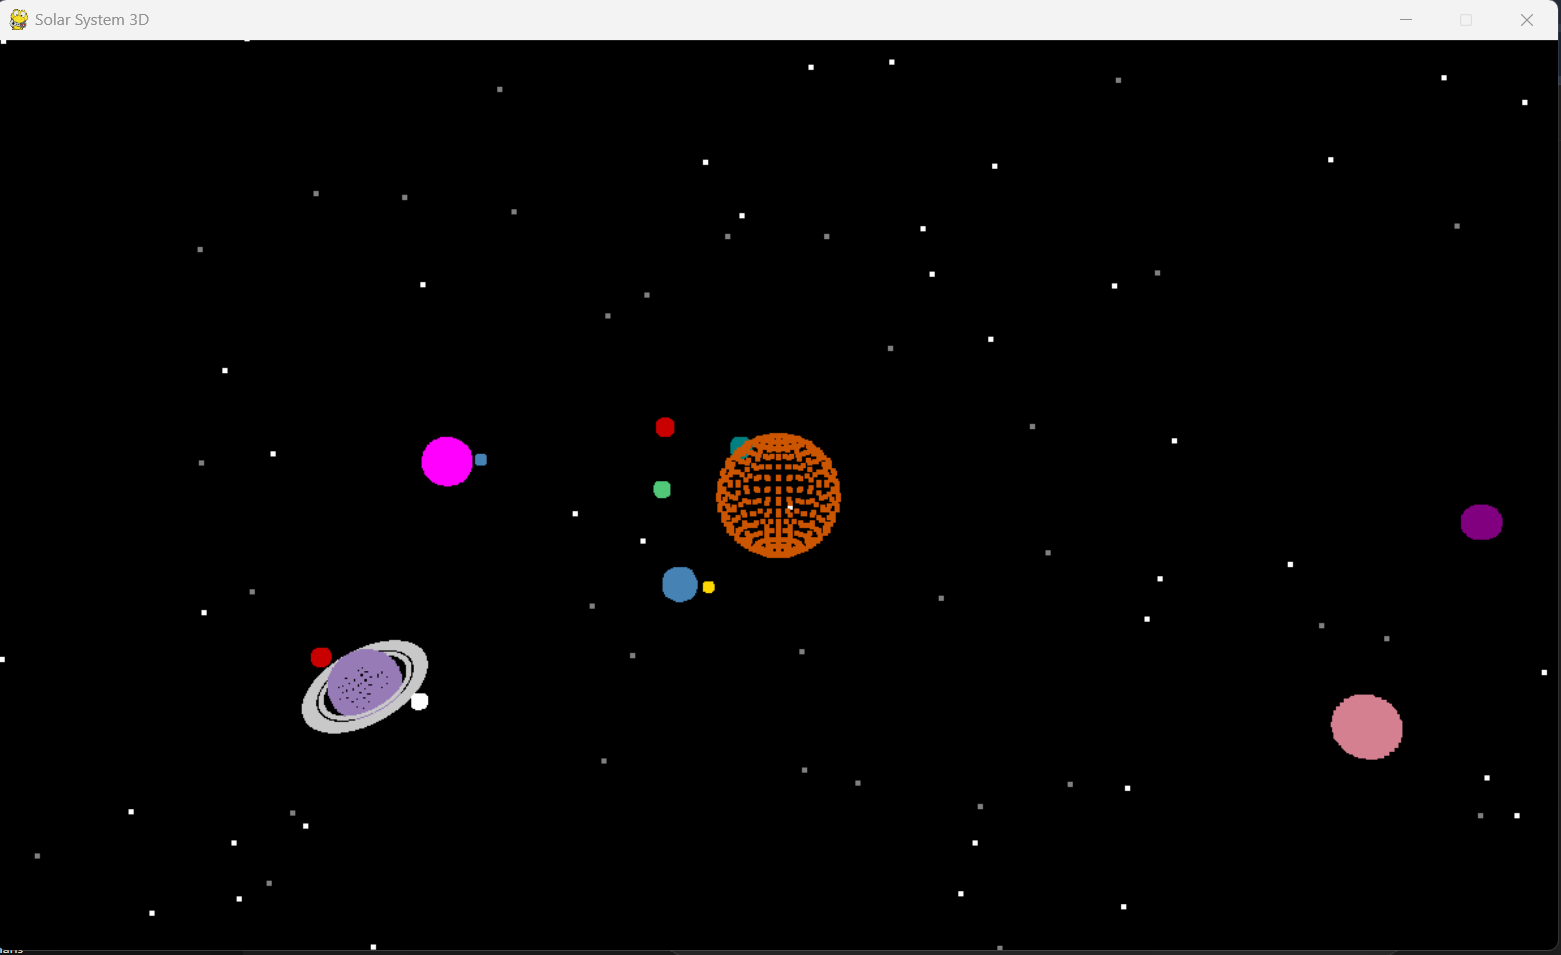

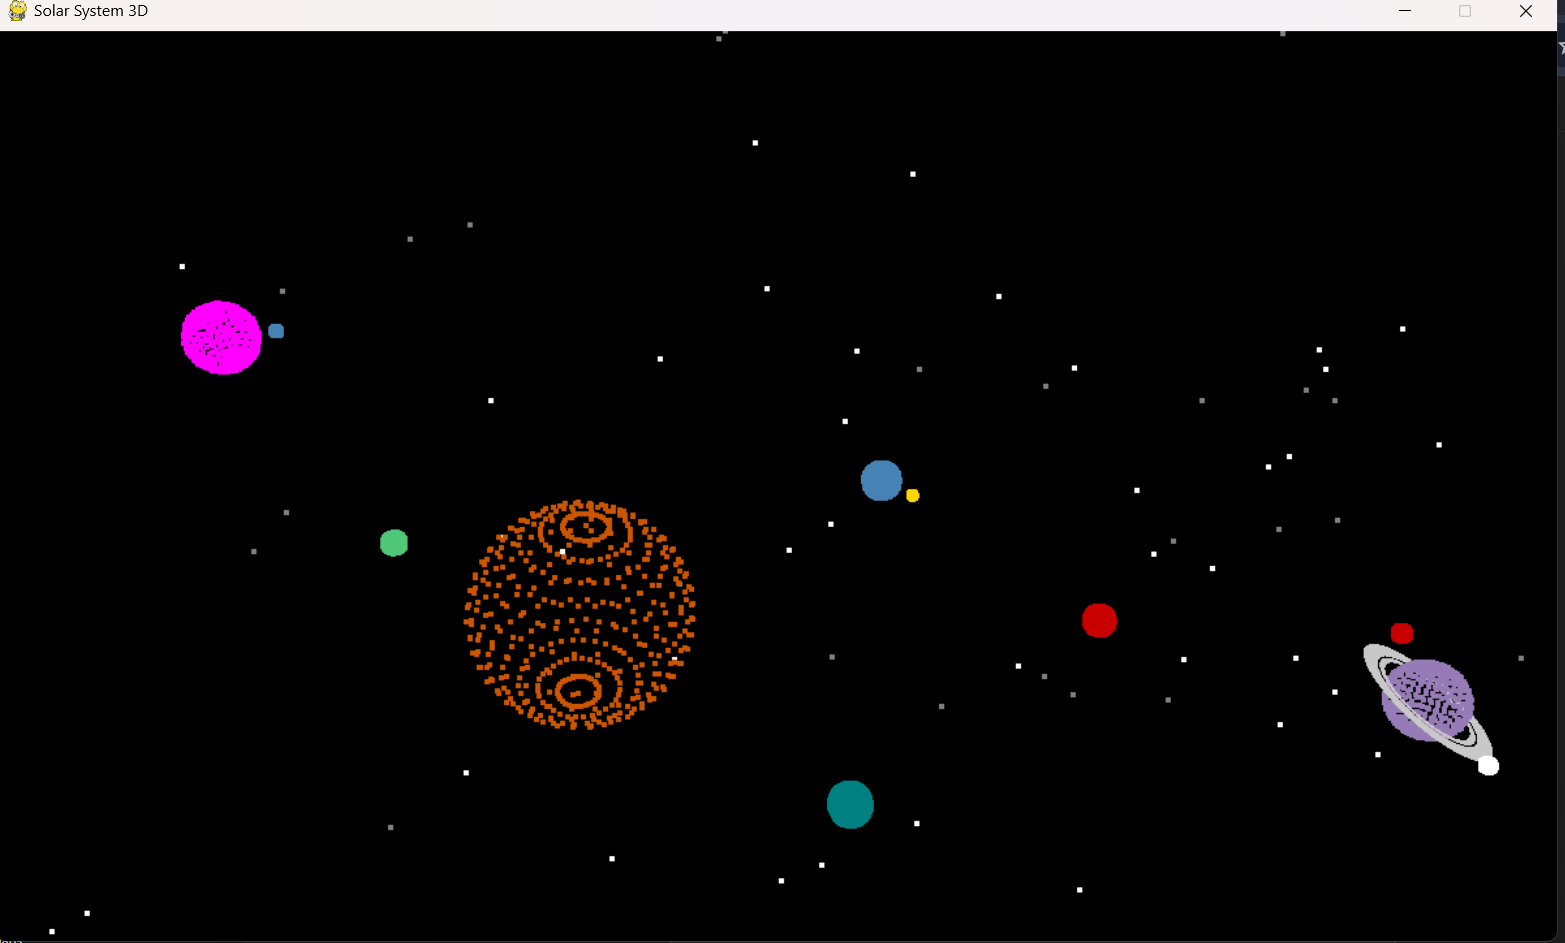

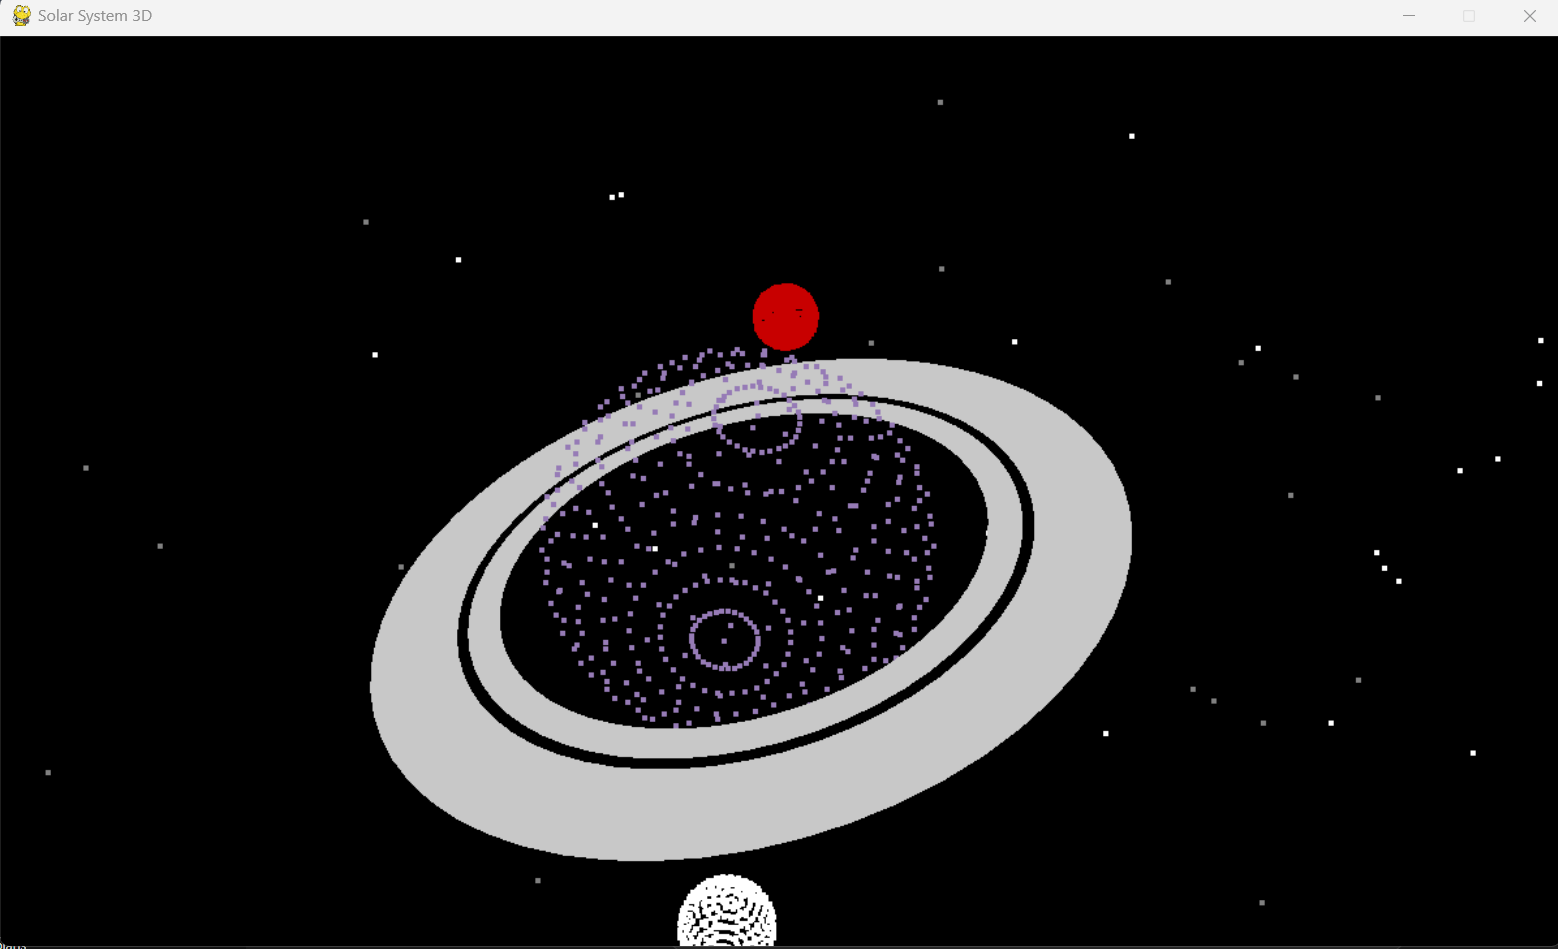

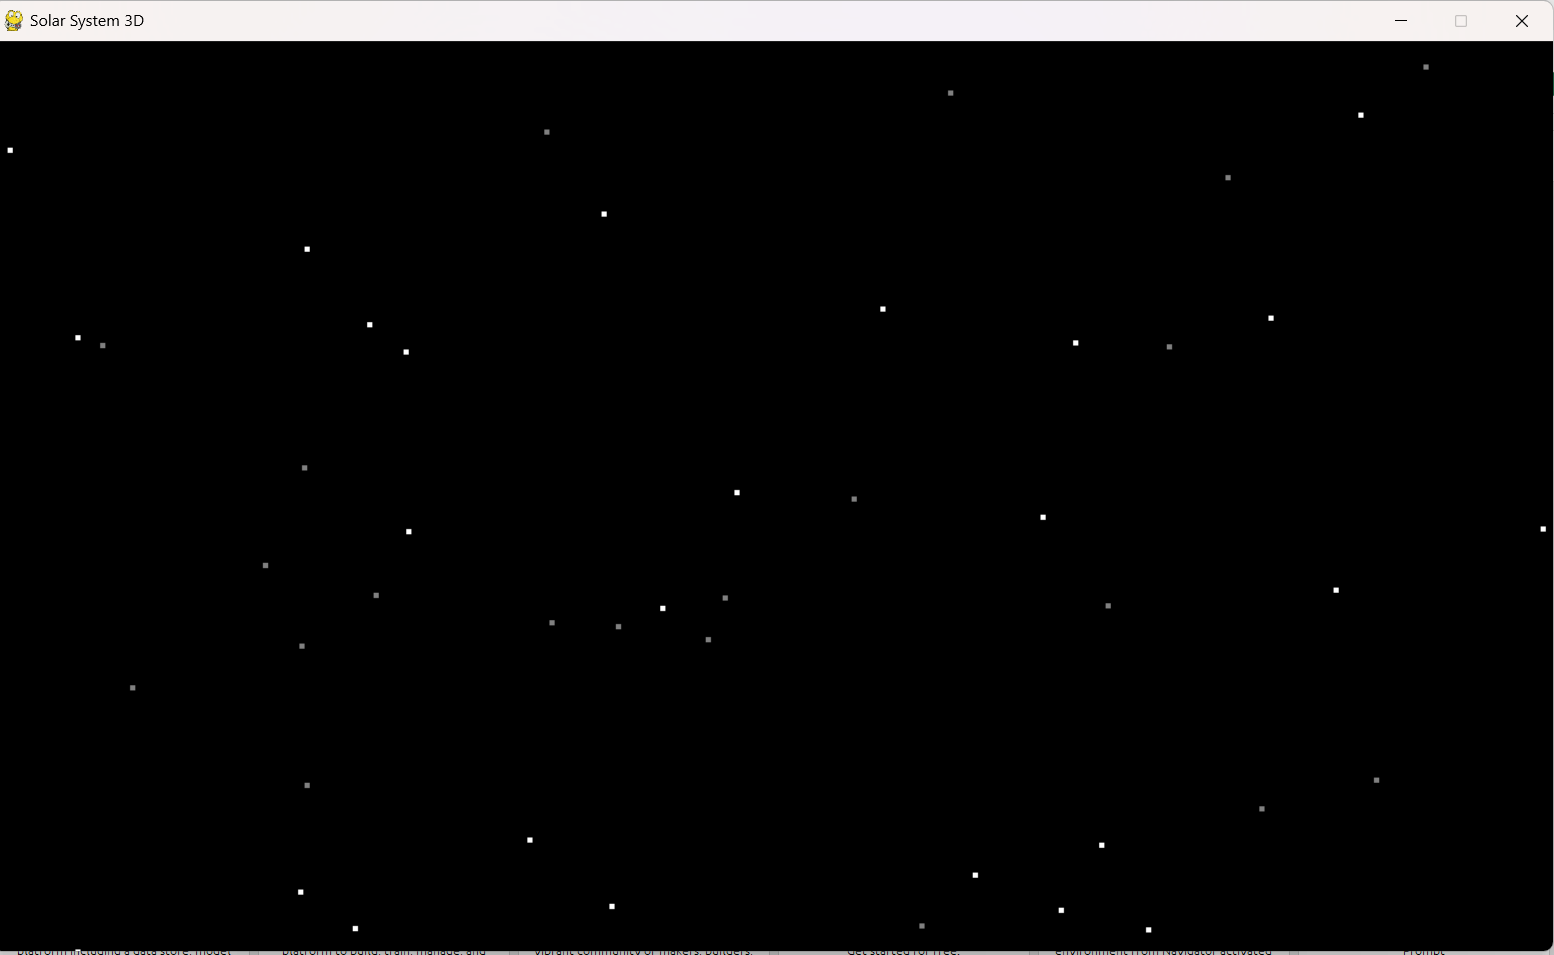